IMPORTING LIBRARIES

In [58]:
!pip install scikit-learn==1.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
!cp drive/MyDrive/17313/predict.py .
!cp drive/MyDrive/17313/model.pkl .
!cp drive/MyDrive/17313/requirements.txt .

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import predict as pred

from sklearn import metrics


INSTALLING DEPENDENCIES (IF NOT DONE YET)

In [62]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


LOADING DATASET

In [63]:
df = pd.read_csv('drive/MyDrive/17313/student_data.csv')
print(df.head())

   Student ID Gender  Age                            Major   GPA  \
0           0      F   21  Statistics and Machine Learning  2.83   
1           1      M   20              Information Systems  2.89   
2           2      F   20                             Math  2.66   
3           3      M   20              Information Systems  2.48   
4           4      F   21  Statistics and Machine Learning  3.30   

     Extra Curricular  Num Programming Languages  Num Past Internships  \
0            Sorority                          4                     1   
1          Fraternity                          5                     3   
2  Teaching Assistant                          3                     1   
3          Fraternity                          5                     0   
4            Sorority                          2                     1   

   Good Candidate  
0               0  
1               0  
2               0  
3               0  
4               0  


PLOTTING DISTRIBUTION OF FEATURES IN TEST DATASET

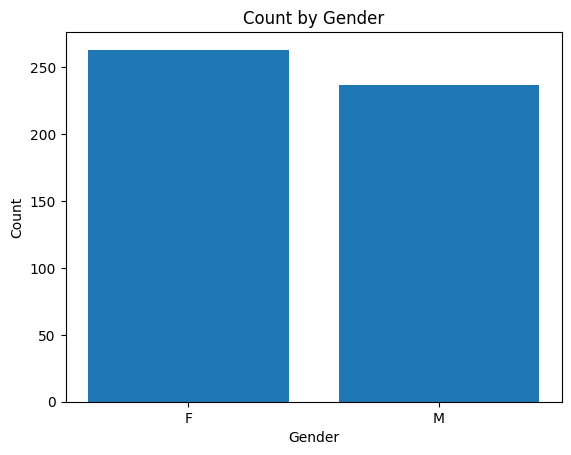

In [64]:
#Gender
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)

plt.title('Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

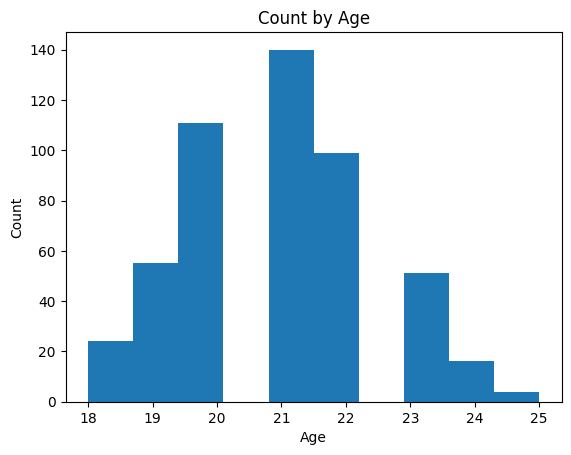

In [65]:
#Age
plt.title('Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.hist(df["Age"])
plt.show()

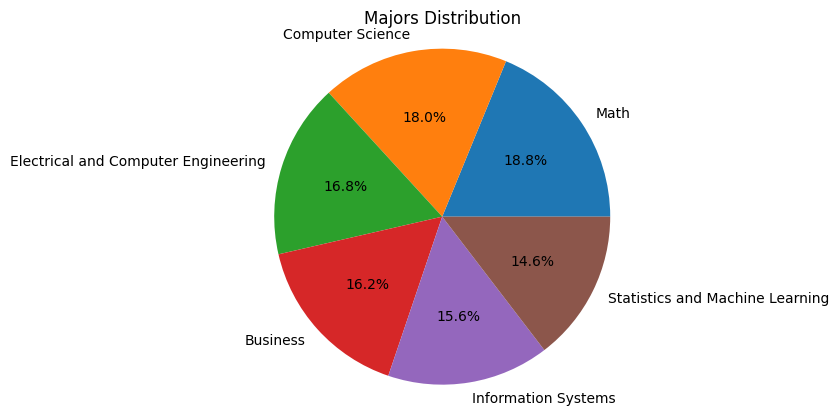

In [66]:
#Majors
major_counts = df["Major"].value_counts()

plt.pie(major_counts, labels=major_counts.index, autopct='%1.1f%%')
plt.title('Majors Distribution')
plt.axis('equal')
plt.show()

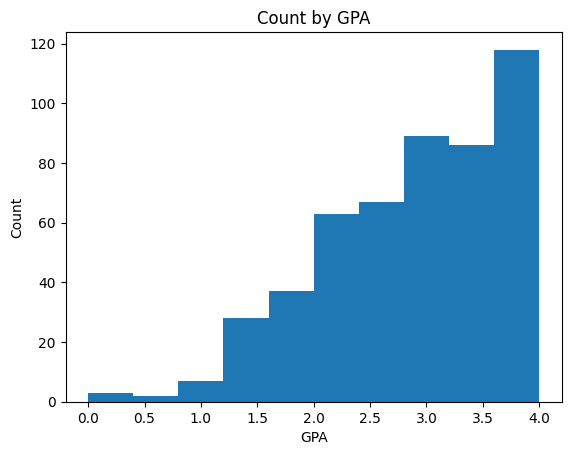

In [67]:
#GPA
plt.title('Count by GPA')
plt.xlabel('GPA')
plt.ylabel('Count')

plt.hist(df["GPA"])
plt.show()

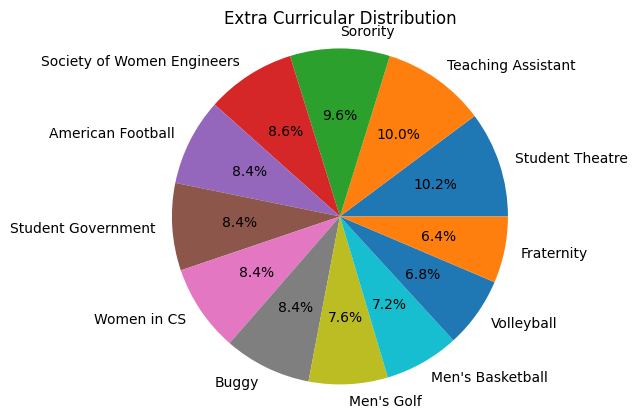

In [68]:
#Extra Curricular
ec_counts = df["Extra Curricular"].value_counts()

plt.pie(ec_counts, labels=ec_counts.index, autopct='%1.1f%%')
plt.title('Extra Curricular Distribution')
plt.axis('equal')
plt.show()

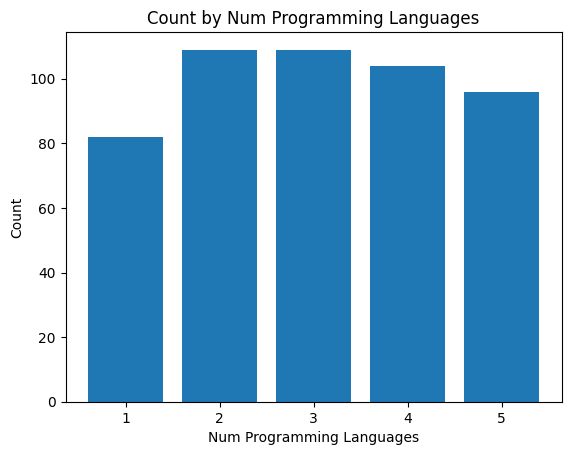

In [69]:
#Num Programming Languages

num_lan_counts = df["Num Programming Languages"].value_counts()
plt.bar(num_lan_counts.index, num_lan_counts.values)

plt.title('Count by Num Programming Languages')
plt.xlabel('Num Programming Languages')
plt.ylabel('Count')

plt.show()

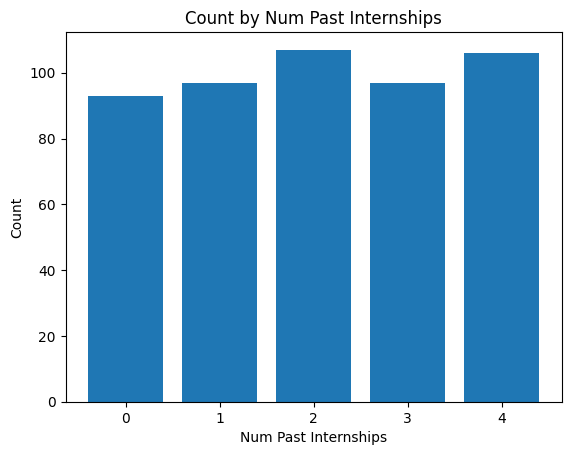

In [70]:
#Num Past Internships
#order = [0, 1, 2, 3, 4]

num_past_int = df["Num Past Internships"].value_counts()
plt.bar(num_past_int.index, num_past_int.values)

plt.title('Count by Num Past Internships')
plt.xlabel('Num Past Internships')
plt.ylabel('Count')

plt.show()

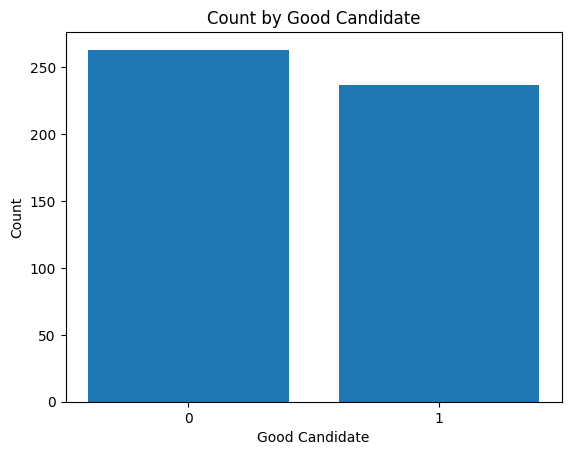

In [71]:
#Good Candidate

good_can = df["Good Candidate"].value_counts()
plt.bar(good_can.index, good_can.values)

plt.title('Count by Good Candidate')
plt.xlabel('Good Candidate')
plt.ylabel('Count')

plt.xticks([0, 1])  # Set x-tick marks to only display values of 0 and 1
plt.show()

PREDICTING OUTPUT OF TEST DATASET

In [72]:
df_X = df.iloc[: , :-1]
df_Y = df.iloc[: , -1:]

#converting X to a list of dicts
dict_list_X = df.to_dict(orient="records")


In [73]:
#predicting output of test dataset based on model
predList = []
for student in dict_list_X:
  res = pred.predict(student)["good_employee"]
  predList.append(res)

RESULT EVALUATION

In [74]:
#accuracy
#check if this is backwards
accuracy = metrics.accuracy_score(df_Y, predList)

In [75]:
accuracy

0.832

In [76]:
#confusion matrix

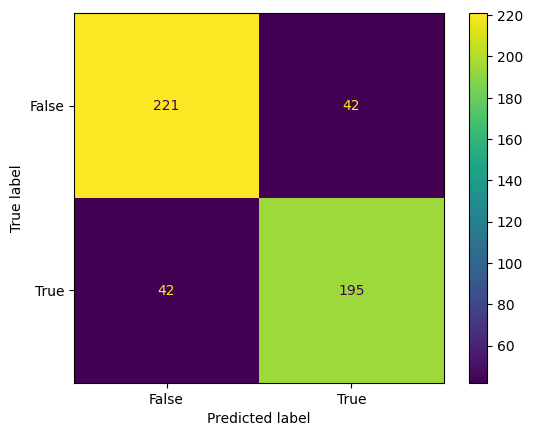

In [77]:
confusion_matrix = metrics.confusion_matrix(df_Y, predList)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

FAIRNESS EVALUATION

In [78]:
# divide the dataset based on gender
df_female = df[df['Gender'] == 'F'] 
df_male = df[df['Gender'] == 'M'] 

In [79]:
df_female_X = df_female.iloc[: , :-1]
df_female_Y = df_female.iloc[: , -1:]

#converting X to a list of dicts
female_dict_list_X = df_female.to_dict(orient="records")

df_male_X = df_male.iloc[: , :-1]
df_male_Y = df_male.iloc[: , -1:]

#converting X to a list of dicts
male_dict_list_X = df_male.to_dict(orient="records")


In [80]:
#predicting output of test dataset based on model
femalePredList = []
for student in female_dict_list_X:
  res = pred.predict(student)["good_employee"]
  femalePredList.append(res)

#predicting output of test dataset based on model
malePredList = []
for student in male_dict_list_X:
  res = pred.predict(student)["good_employee"]
  malePredList.append(res)

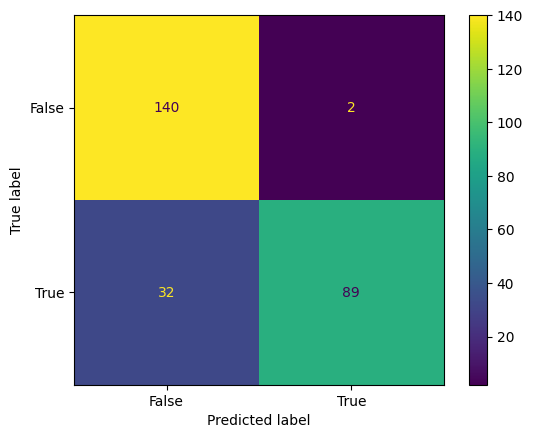

In [84]:
# confusion matrix for female group
confusion_matrix = metrics.confusion_matrix(df_female_Y, femalePredList)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

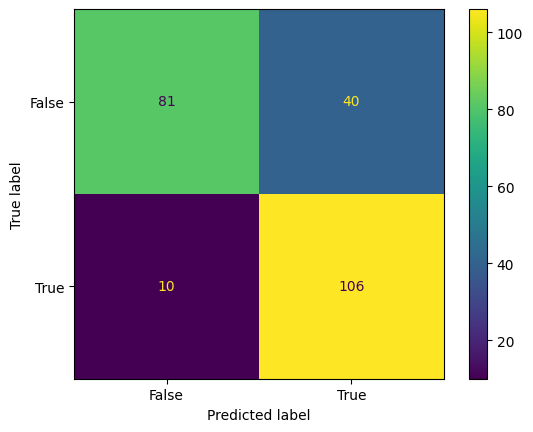

In [85]:
# confusion matrix for male group
confusion_matrix = metrics.confusion_matrix(df_male_Y, malePredList)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [86]:
# Disparate impact ratio = Pr(Y=1|D=Female)/Pr(Y=1|D=Male)
Pr_Female = (32+89)/len(femalePredList)
Pr_Male = (10+106)/len(malePredList)
DIR = Pr_Female/Pr_Male
DIR

0.9399829552904155

In [87]:
# Statistical parity difference = Pr(Y=1|D=Female) - Pr(Y=1|D=Male)
SPD = Pr_Female - Pr_Male
SPD

-0.029375431165872545

In [88]:
# Equal opportunity difference = TPR|D=Female - TPR|D=Male
# TPR = TP/TP+FN
TPR_Female = 89/(89+32)
TPR_Male = 106/(106+10)
EOD = TPR_Female - TPR_Male
EOD

-0.1782559133656313

In [89]:
# Equalized odds difference = (FPR|D=Female - FPR|D=Male)/2
# FPR = FP/FP+TN
FPR_Female = 2/(2+140)
FPR_Male = 40/(40+81)
EqOD = (FPR_Female - FPR_Male)/2
EqOD

-0.15824700267722036